In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings(action='ignore')

In [29]:
df1=pd.read_excel('Email Raw Data_Updated_28Sep.xlsx',sheet_name='Sep_NA',encoding='ISO-8859-1')

In [30]:
df1.head()

,ConversationID,Subject,Sender,FolderName,DateTimeReceived,ToLine,CCLine,Date,DatetimeReceivedPST,IsComplete,CompletedDate,CompletedBy,Category,StartTime,ReplyTime,Scored Labels,Scored Labels12,ToLine1,ToLine2,Sender_Alias
0,AAQkADhlNzNmMWQ5LTNkNDMtNDdkNC1iMGM0LTk3Y2U5N2...,PO# 99523669 // DocuSign Reminder 01 Supplier ...,v-mahawa@microsoft.com,NaN,2020-09-24T15:24:02+00:00,raman.v@tcs.com,shumaelr@microsoft.com;v-akaul,2020-09-24,09/24/2020 08:24:2 AM,NaN,NaN,NaN,NaN,NaT,NaN,Reminder,Reminder-DocuSign,raman.v,NaN,v-mahawa
1,AAQkADhlNzNmMWQ5LTNkNDMtNDdkNC1iMGM0LTk3Y2U5N2...,RE: Signature required _ LINXTELECOM_ TRIM.20...,v-parche@microsoft.com,NaN,2020-09-24T16:37:31+00:00,v-olsob@microsoft.com;zhtileum,Kristina.Tikhonova@microsoft.c,2020-09-24,09/24/2020 09:37:31 AM,NaN,NaN,NaN,NaN,2020-09-24 07:52:35,NaN,Quotations,Assitance Required-Reason,v-olsob,zhtileum,v-parche
2,AAQkADhlNzNmMWQ5LTNkNDMtNDdkNC1iMGM0LTk3Y2U5N2...,RE: VSO# 435472// DocuSign Reminder 03 Supplie...,v-pushs@microsoft.com,NaN,2020-09-24T17:12:06+00:00,george.dellarocca@bmo.com,ccpe@microsoft.com;Jorge.Flore,2020-09-24,09/24/2020 10:12:6 AM,NaN,NaN,NaN,NaN,NaT,NaN,Reminder,Reminder-DocuSign,george.dellarocca,NaN,v-pushs
3,AAQkADhlNzNmMWQ5LTNkNDMtNDdkNC1iMGM0LTk3Y2U5N2...,99520574// DWT Review Requested// EdgeConneX Inc,v-shipaw@microsoft.com,NaN,2020-09-24T17:32:40+00:00,Neda.Vassey@microsoft.com,ccpe@microsoft.com,2020-09-24,09/24/2020 10:32:40 AM,NaN,NaN,NaN,NaN,NaT,NaN,DWT Review Requested,DWT Review Requested,Neda.Vassey,NaN,v-shipaw
4,AAQkADhlNzNmMWQ5LTNkNDMtNDdkNC1iMGM0LTk3Y2U5N2...,RE: PO 99513289 PO 99526062 PO 99526073 PO 995...,v-lashir@microsoft.com,NaN,2020-09-24T17:42:21+00:00,niwhit@microsoft.com;Bjorn.Joh,ccpe@microsoft.com,2020-09-24,09/24/2020 10:42:21 AM,NaN,NaN,NaN,NaN,2020-09-24 08:34:32,NaN,Quotations,Documentation Required-Quotations,niwhit,Bjorn.Joh,v-lashir


In [31]:
df1.columns

Index(['ConversationID', 'Subject', 'Sender', 'FolderName', 'DateTimeReceived',
       'ToLine', 'CCLine', 'Date', 'DatetimeReceivedPST', 'IsComplete',
       'CompletedDate', 'CompletedBy', 'Category', 'StartTime', 'ReplyTime',
       'Scored Labels', 'Scored Labels12', 'ToLine1', 'ToLine2',
       'Sender_Alias'],
      dtype='object')

In [32]:
df1.rename(columns={'Scored Labels':'Email_Category2','Scored Labels12':'Email_Category12'},inplace=True)

In [34]:
#Lets select only required columns for analyis
col=['Email_Category2','Email_Category12', 'ToLine1', 'ToLine2', 'Sender_Alias']
df2=df1[col]

In [35]:
df2.head()

,Email_Category2,Email_Category12,ToLine1,ToLine2,Sender_Alias
0,Reminder,Reminder-DocuSign,raman.v,NaN,v-mahawa
1,Quotations,Assitance Required-Reason,v-olsob,zhtileum,v-parche
2,Reminder,Reminder-DocuSign,george.dellarocca,NaN,v-pushs
3,DWT Review Requested,DWT Review Requested,Neda.Vassey,NaN,v-shipaw
4,Quotations,Documentation Required-Quotations,niwhit,Bjorn.Joh,v-lashir


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Email_Category2   2085 non-null   object
 1   Email_Category12  2085 non-null   object
 2   ToLine1           2083 non-null   object
 3   ToLine2           680 non-null    object
 4   Sender_Alias      2085 non-null   object
dtypes: object(5)
memory usage: 81.6+ KB


In [62]:
df2[:].nunique()

Email_Category2       9
Email_Category12     22
ToLine1             532
ToLine2             321
Sender_Alias         22
dtype: int64

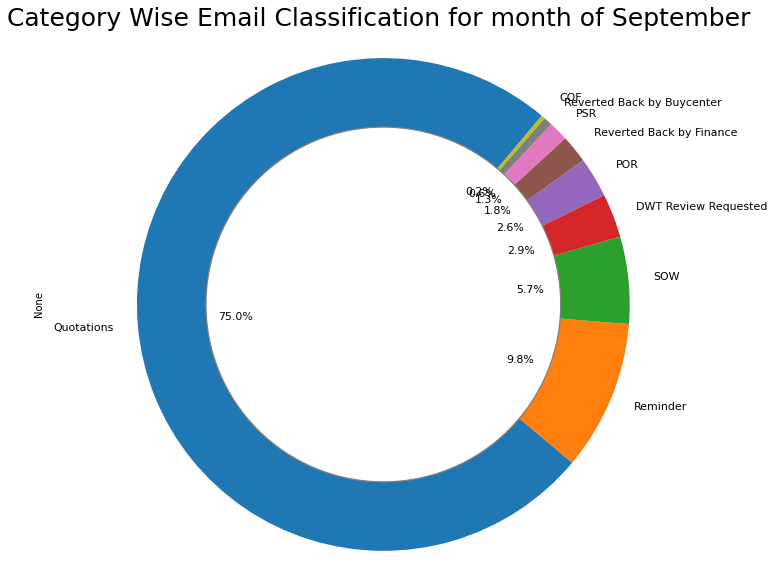

In [38]:
#Lets see which category wise distribusion
df2.Email_Category2.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(
    figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=11)
plt.title("Category Wise Email Classification for month of September ",fontsize=25)

#https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

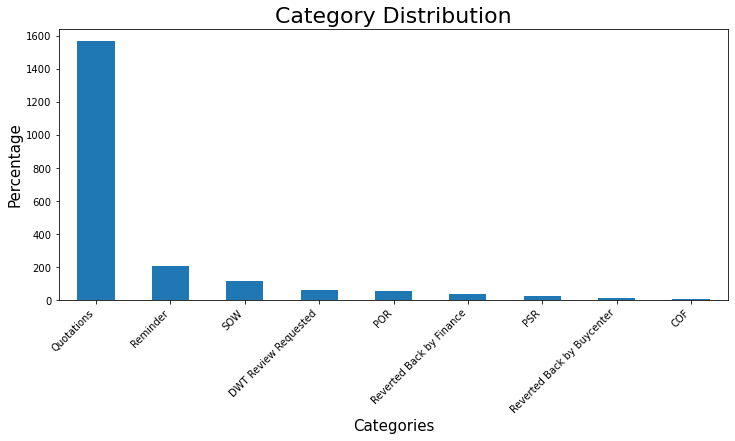

In [42]:
df2['Email_Category2'].value_counts().plot.bar(figsize=(12,5))
plt.title("Category Distribution",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Categories",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

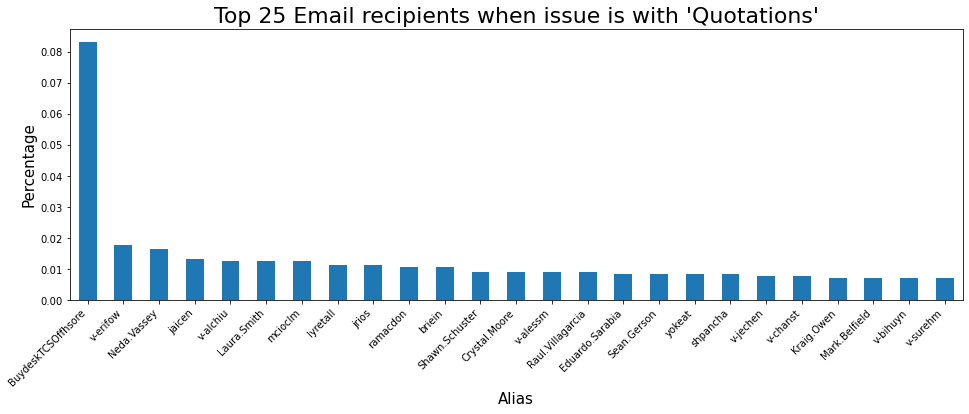

In [53]:
qo= df2[df2['Email_Category2']=='Quotations']
qo['ToLine1'].value_counts(normalize=True).nlargest(25).plot.bar(figsize=(16,5))
plt.title("Top 25 Email recipients when issue is with 'Quotations'",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Alias",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

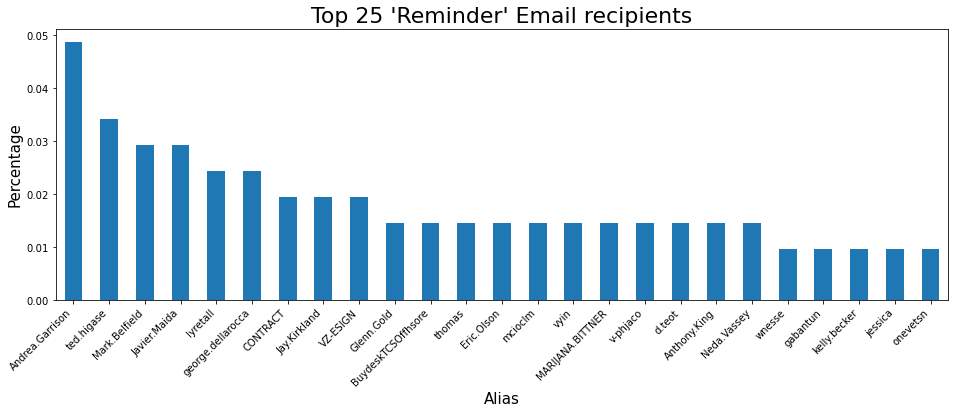

In [54]:
re= df2[df2['Email_Category2']=='Reminder']
re['ToLine1'].value_counts(normalize=True).nlargest(25).plot.bar(figsize=(16,5))
plt.title("Top 25 'Reminder' Email recipients",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Alias",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

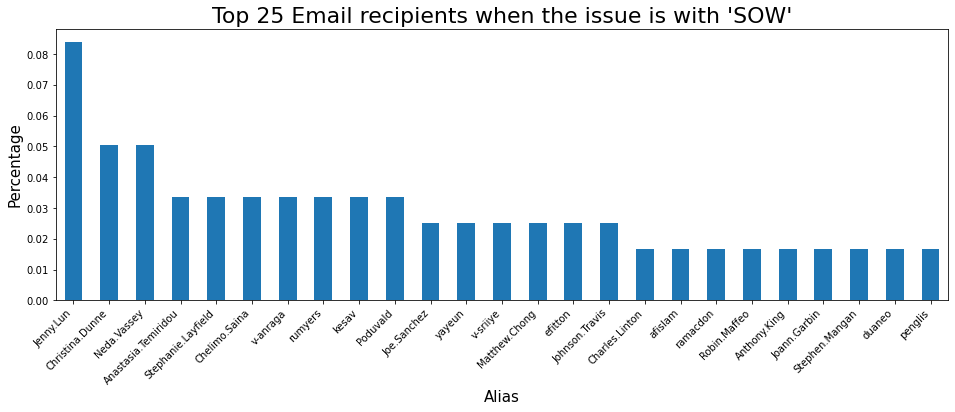

In [56]:
sow= df2[df2['Email_Category2']=='SOW']
sow['ToLine1'].value_counts(normalize=True).nlargest(25).plot.bar(figsize=(16,5))
plt.title("Top 25 Email recipients when the issue is with 'SOW'",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Alias",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

## Let's do analysis for Email classification Level1 and 2 Combine

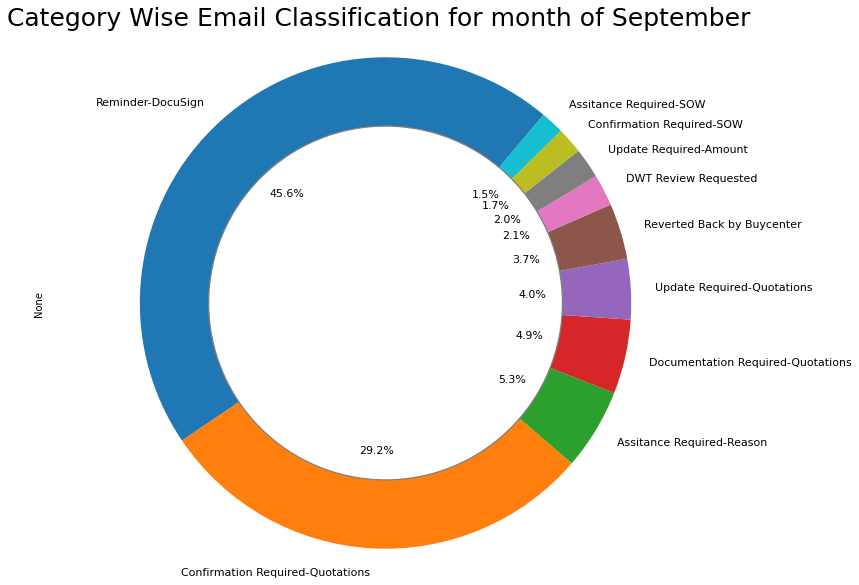

In [60]:
df2.Email_Category12.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(
    figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=11)
plt.title("Category Wise Email Classification for month of September ",fontsize=25)

#https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

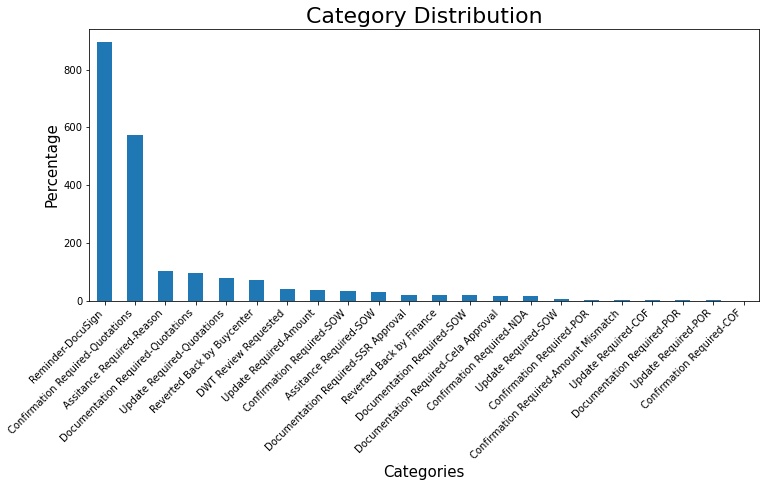

In [61]:
df2['Email_Category12'].value_counts().plot.bar(figsize=(12,5))
plt.title("Category Distribution",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Categories",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

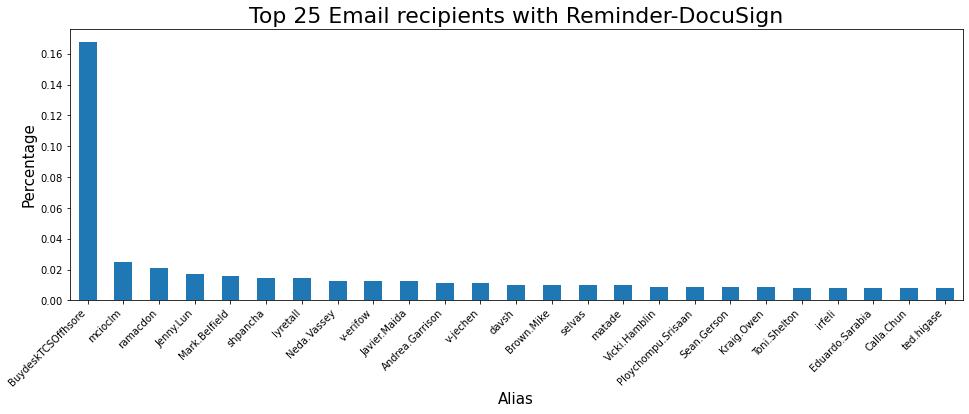

In [65]:
rds= df2[df2['Email_Category12']=='Reminder-DocuSign']
rds['ToLine1'].value_counts(normalize=True).nlargest(25).plot.bar(figsize=(16,5))
plt.title("Top 25 Email recipients with Reminder-DocuSign",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Alias",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

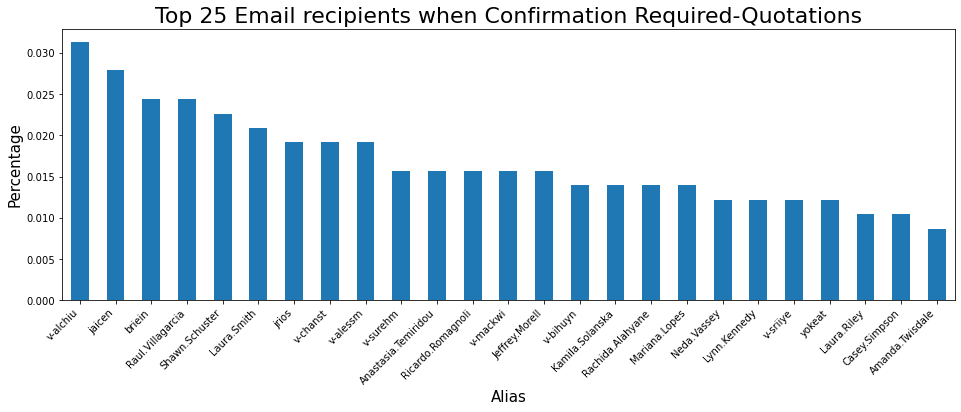

In [64]:
cqo= df2[df2['Email_Category12']=='Confirmation Required-Quotations']
cqo['ToLine1'].value_counts(normalize=True).nlargest(25).plot.bar(figsize=(16,5))
plt.title("Top 25 Email recipients when Confirmation Required-Quotations",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Alias",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

### Top 25 Email Senders

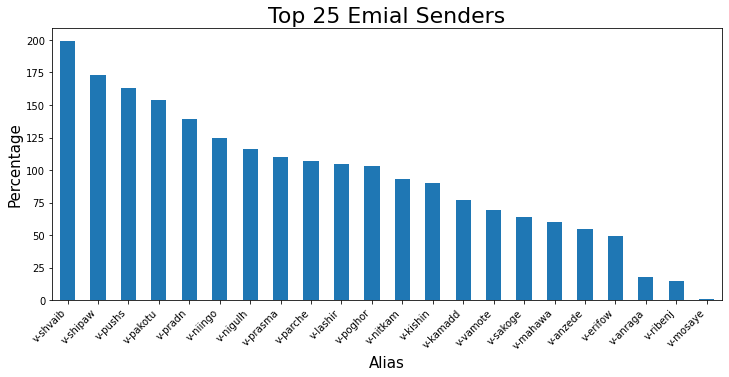

In [66]:
df2['Sender_Alias'].value_counts().nlargest(25).plot.bar(figsize=(12,5))
plt.title("Top 25 Emial Senders",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Alias",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

## We are trying to answer some of the questions like<br>

#### Total Email Flow in the month Of September
#### ----->>6151

#### How Many emails are triggred from TCS team in the month of September
#### ---->> 2085

#### Which are the top 3 issues (Secondary) for which emails are triggred
#### ---->> Quotation, Reminder, SOW

#### Which are the top 3 issues (Primary & Secondary) for which emails are triggred
#### ---->> Confirmation required -Quotation, Reminder-DocuSign, Assistance Required-Reason
